In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Load meta data for sample dataframe, includes the information for 87 sample.
#Link for more info: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52588
#Link to download file:
# https://ftp.ncbi.nlm.nih.gov/geo/series/GSE52nnn/GSE52588/matrix/GSE52588_series_matrix.txt.gz
meta_df= pd.read_table('GSE52588_series_matrix.txt',skiprows=51,index_col=0)

In [4]:
label=pd.DataFrame(meta_df.loc['!Sample_characteristics_ch1'].iloc[1,:])

In [5]:
label

,!Sample_characteristics_ch1
GSM1272122,disease state: Down syndrome
GSM1272123,disease state: Down syndrome
GSM1272124,disease state: Down syndrome
GSM1272125,disease state: Down syndrome
GSM1272126,disease state: Down syndrome
...,...
GSM1272204,disease state: healthy
GSM1272205,disease state: healthy
GSM1272206,disease state: healthy
GSM1272207,disease state: healthy


In [6]:
#Load sample dataframe, includes the CpGs for 87 sample.
#Link for more info: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE52588
#Link to download file:
# https://ftp.ncbi.nlm.nih.gov/geo/series/GSE52nnn/GSE52588/matrix/GSE52588_series_matrix.txt.gz
df = pd.read_table('GSE52588_series_matrix.txt',skiprows=51+36,index_col=0)


In [7]:
#Load coefficients for 651 CpGs
#Link for more info: https://www.nature.com/articles/s41467-021-21064-z#Sec20 
#Supplementary table 2
#Link to download file:
# https://static-content.springer.com/esm/art%3A10.1038%2Fs41467-021-21064-z/MediaObjects/41467_2021_21064_MOESM6_ESM.xlsx
coef=pd.read_excel('41467_2021_21064_MOESM6_ESM.xlsx', sheet_name='EWAS_autosomes', skiprows=2, index_col='CpG')


In [33]:
#find common CpGs between the coefficient table and the sample table
common_indexes = df.index.intersection(coef.index)
# common_indexes = common_indexes.sort_values(by='Salary')
(common_indexes)

Index(['cg00017931', 'cg00253658', 'cg00270625', 'cg00443981', 'cg00502597',
       'cg00598394', 'cg00621943', 'cg00641679', 'cg00701946', 'cg00718518',
       ...
       'cg26890182', 'cg26895804', 'cg26939946', 'cg26983198', 'cg27003765',
       'cg27131667', 'cg27292710', 'cg27489873', 'cg27496339', 'cg27502912'],
      dtype='object', length=317)

In [9]:
#coefficients for common CpGs
common_coef=coef.loc[common_indexes]['beta_overall']
common_coef=pd.DataFrame(common_coef)
common_coef

,beta_overall
cg00017931,-0.103422
cg00253658,0.305036
cg00270625,0.282725
cg00443981,0.125699
cg00502597,0.058527
...,...
cg27131667,-0.063509
cg27292710,-0.104862
cg27489873,-0.095791
cg27496339,0.184783


In [103]:
n=317
# top_common_coef = common_coef.sort_values(by=abs('beta_overall'), ascending=False)
top_common_coef = common_coef.loc[abs(common_coef['beta_overall']).sort_values(ascending=False).index]
top_common_coef=top_common_coef.head(n)
top_common_coef

,beta_overall
cg03142697,0.395569
cg00994804,0.388409
cg12477880,0.382631
cg19112186,0.368347
cg05156901,0.346582
...,...
cg11456334,0.011110
cg01145054,-0.008277
cg21135948,-0.007390
cg12258307,-0.007199


In [104]:
common_indexes=top_common_coef.index
common_indexes

Index(['cg03142697', 'cg00994804', 'cg12477880', 'cg19112186', 'cg05156901',
       'cg08260245', 'cg10770023', 'cg24363820', 'cg00253658', 'cg06530441',
       ...
       'cg02285386', 'cg23097155', 'cg25857090', 'cg22488975', 'cg23837804',
       'cg11456334', 'cg01145054', 'cg21135948', 'cg12258307', 'cg13758712'],
      dtype='object', length=317)

In [105]:
common_coef.isna().any().any()

False

In [106]:
#finding common CpGs for samples
sample_df=df.loc[common_indexes]
sample_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272199,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208
cg03142697,0.765006,0.787154,0.646032,0.639016,0.790171,0.775633,0.815492,0.835098,0.696037,0.737756,...,0.368345,0.251749,0.252366,0.116450,0.286302,0.302319,0.167914,0.185161,0.269405,0.141229
cg00994804,0.664598,0.716580,0.606241,0.624763,0.736029,0.726355,0.818188,0.831673,0.589140,0.671840,...,0.444780,0.338847,0.384856,0.086057,0.449115,0.444398,0.271086,0.330266,0.409762,0.146387
cg12477880,0.724622,0.773354,0.643922,0.674983,0.779940,0.762136,0.834774,0.860417,0.662864,0.703031,...,0.471187,0.394377,0.414290,0.114014,0.448230,0.494125,0.274954,0.347954,0.409947,0.160264
cg19112186,0.911562,0.931745,0.851872,0.869113,0.866614,0.977866,0.708291,0.933732,0.838724,0.809842,...,0.514207,0.505370,0.529512,0.578256,0.723978,0.768661,0.772770,0.676360,0.663813,0.626297
cg05156901,0.904015,0.934432,0.883499,0.873492,0.881485,0.964783,0.719453,0.944279,0.847452,0.829536,...,0.502799,0.521211,0.581611,0.573712,0.722836,0.788261,0.889209,0.678049,0.686953,0.654106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg11456334,0.985423,0.990209,0.981116,0.948600,0.977207,0.975550,0.989392,0.980054,0.973383,0.984933,...,0.965437,0.980035,0.962775,0.975369,0.962513,0.975453,0.977194,0.964710,0.957762,0.956168
cg01145054,0.000000,0.006939,0.000000,0.000000,0.000000,0.007827,0.002149,0.000000,0.000000,0.000000,...,0.008125,0.007068,0.000000,0.001363,0.006898,0.015942,0.003885,0.008021,0.000000,0.000000
cg21135948,0.026337,0.035574,0.007398,0.008070,0.013709,0.015789,0.000000,0.024244,0.026316,0.002326,...,0.029424,0.034625,0.027541,0.021594,0.015905,0.027800,0.021053,0.029654,0.023359,0.014906
cg12258307,0.014238,0.031498,0.015476,0.000000,0.016827,0.007036,0.016954,0.004553,0.019805,0.007991,...,0.011641,0.003498,0.031880,0.034269,0.032012,0.019567,0.019793,0.022724,0.043633,NaN


In [107]:
sample_df.isna().any().any()

True

In [108]:
#fill NaN in sample_df with the mean of the corresponding CpG over the sample
def fillna_with_row_mean(row):
    row_mean = row.mean()
    return row.fillna(row_mean)

sample_df = sample_df.apply(fillna_with_row_mean, axis=1)

In [109]:
merged_df = pd.merge(sample_df, common_coef, left_index=True, right_index=True)
merged_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208,beta_overall
cg03142697,0.765006,0.787154,0.646032,0.639016,0.790171,0.775633,0.815492,0.835098,0.696037,0.737756,...,0.251749,0.252366,0.116450,0.286302,0.302319,0.167914,0.185161,0.269405,0.141229,0.395569
cg00994804,0.664598,0.716580,0.606241,0.624763,0.736029,0.726355,0.818188,0.831673,0.589140,0.671840,...,0.338847,0.384856,0.086057,0.449115,0.444398,0.271086,0.330266,0.409762,0.146387,0.388409
cg12477880,0.724622,0.773354,0.643922,0.674983,0.779940,0.762136,0.834774,0.860417,0.662864,0.703031,...,0.394377,0.414290,0.114014,0.448230,0.494125,0.274954,0.347954,0.409947,0.160264,0.382631
cg19112186,0.911562,0.931745,0.851872,0.869113,0.866614,0.977866,0.708291,0.933732,0.838724,0.809842,...,0.505370,0.529512,0.578256,0.723978,0.768661,0.772770,0.676360,0.663813,0.626297,0.368347
cg05156901,0.904015,0.934432,0.883499,0.873492,0.881485,0.964783,0.719453,0.944279,0.847452,0.829536,...,0.521211,0.581611,0.573712,0.722836,0.788261,0.889209,0.678049,0.686953,0.654106,0.346582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg11456334,0.985423,0.990209,0.981116,0.948600,0.977207,0.975550,0.989392,0.980054,0.973383,0.984933,...,0.980035,0.962775,0.975369,0.962513,0.975453,0.977194,0.964710,0.957762,0.956168,0.011110
cg01145054,0.000000,0.006939,0.000000,0.000000,0.000000,0.007827,0.002149,0.000000,0.000000,0.000000,...,0.007068,0.000000,0.001363,0.006898,0.015942,0.003885,0.008021,0.000000,0.000000,-0.008277
cg21135948,0.026337,0.035574,0.007398,0.008070,0.013709,0.015789,0.000000,0.024244,0.026316,0.002326,...,0.034625,0.027541,0.021594,0.015905,0.027800,0.021053,0.029654,0.023359,0.014906,-0.007390
cg12258307,0.014238,0.031498,0.015476,0.000000,0.016827,0.007036,0.016954,0.004553,0.019805,0.007991,...,0.003498,0.031880,0.034269,0.032012,0.019567,0.019793,0.022724,0.043633,0.020029,-0.007199


In [110]:
#Multiply each CPG methylation value with the corresponding coefficient
result_df = merged_df.iloc[:, :-1] * merged_df['beta_overall'].values.reshape(-1, 1)
result_df

,GSM1272122,GSM1272123,GSM1272124,GSM1272125,GSM1272126,GSM1272127,GSM1272128,GSM1272129,GSM1272130,GSM1272131,...,GSM1272199,GSM1272200,GSM1272201,GSM1272202,GSM1272203,GSM1272204,GSM1272205,GSM1272206,GSM1272207,GSM1272208
cg03142697,0.302612,0.311373,0.255550,0.252775,0.312567,0.306816,0.322583,0.330339,0.275330,0.291833,...,0.145706,0.099584,0.099828,0.046064,0.113252,0.119588,0.066421,0.073244,0.106568,0.055866
cg00994804,0.258136,0.278326,0.235470,0.242663,0.285880,0.282123,0.317792,0.323029,0.228827,0.260949,...,0.172756,0.131611,0.149482,0.033425,0.174440,0.172608,0.105292,0.128278,0.159155,0.056858
cg12477880,0.277263,0.295909,0.246384,0.258269,0.298429,0.291617,0.319410,0.329222,0.253632,0.269001,...,0.180291,0.150901,0.158520,0.043625,0.171506,0.189067,0.105206,0.133138,0.156858,0.061322
cg19112186,0.335772,0.343206,0.313785,0.320135,0.319215,0.360194,0.260897,0.343938,0.308942,0.298303,...,0.189407,0.186152,0.195045,0.212999,0.266675,0.283134,0.284648,0.249135,0.244514,0.230695
cg05156901,0.313316,0.323858,0.306205,0.302737,0.305507,0.334377,0.249350,0.327270,0.293712,0.287503,...,0.174261,0.180643,0.201576,0.198839,0.250522,0.273198,0.308184,0.235000,0.238086,0.226702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg11456334,0.010948,0.011001,0.010900,0.010539,0.010857,0.010838,0.010992,0.010888,0.010814,0.010942,...,0.010726,0.010888,0.010696,0.010836,0.010693,0.010837,0.010856,0.010718,0.010640,0.010623
cg01145054,-0.000000,-0.000057,-0.000000,-0.000000,-0.000000,-0.000065,-0.000018,-0.000000,-0.000000,-0.000000,...,-0.000067,-0.000059,-0.000000,-0.000011,-0.000057,-0.000132,-0.000032,-0.000066,-0.000000,-0.000000
cg21135948,-0.000195,-0.000263,-0.000055,-0.000060,-0.000101,-0.000117,-0.000000,-0.000179,-0.000194,-0.000017,...,-0.000217,-0.000256,-0.000204,-0.000160,-0.000118,-0.000205,-0.000156,-0.000219,-0.000173,-0.000110
cg12258307,-0.000102,-0.000227,-0.000111,-0.000000,-0.000121,-0.000051,-0.000122,-0.000033,-0.000143,-0.000058,...,-0.000084,-0.000025,-0.000229,-0.000247,-0.000230,-0.000141,-0.000142,-0.000164,-0.000314,-0.000144


In [111]:
regression_results=pd.DataFrame(result_df.sum())
regression_results = pd.merge(regression_results, label, left_index=True, right_index=True)
regression_results.rename(columns={0: 'Epigenetic Score'}, inplace=True)
regression_results.rename(columns={'!Sample_characteristics_ch1': 'Disease State'}, inplace=True)
regression_results['Disease State'] = regression_results['Disease State'].str.replace('disease state: ', '')
regression_results['Disease State'] = regression_results['Disease State'].str.title()
regression_results['Disease State'] = regression_results['Disease State'].str.title()

In [112]:
regression_results

,Epigenetic Score,Disease State
GSM1272122,4.410935,Down Syndrome
GSM1272123,4.760572,Down Syndrome
GSM1272124,4.046291,Down Syndrome
GSM1272125,4.120414,Down Syndrome
GSM1272126,4.237326,Down Syndrome
...,...,...
GSM1272204,-0.965913,Healthy
GSM1272205,-1.594017,Healthy
GSM1272206,-1.820427,Healthy
GSM1272207,-1.759635,Healthy


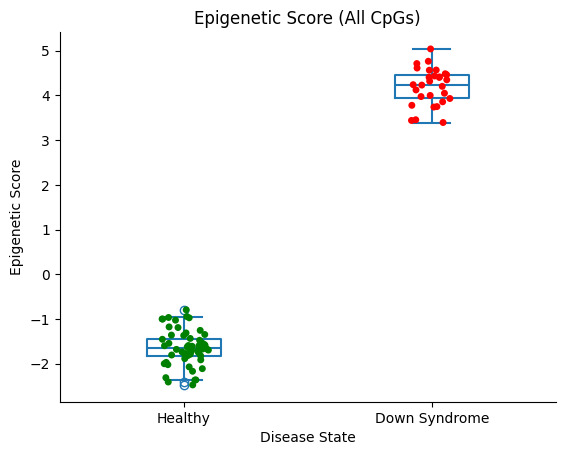

In [113]:
category_order = ['Healthy', 'Down Syndrome']
ax=sns.boxplot(x='Disease State', y='Epigenetic Score', data=regression_results, width=0.3,  fill=None, order=category_order)
sns.stripplot(x='Disease State', y='Epigenetic Score', data=regression_results, jitter=True,palette={'Healthy': 'green', 'Down Syndrome': 'red'}, order=category_order)
ax.set_title('Epigenetic Score (All CpGs)')
sns.despine()